# 🛍️ EDA Produk – Shopee Analytics

Analisis data produk meliputi kategori, harga, dan rating untuk mengetahui preferensi dan karakteristik produk yang tersedia.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils.plot_helper import save_plot

df_products = pd.read_csv("../data/raw/products.csv")
df_products.head()

,product_id,name,category,price,rating
0,P0001,Illo Elektronik 912,Elektronik,612811,4.00
1,P0002,Iure Fashion 882,Fashion,2217060,3.59
2,P0003,Aliquid Fashion 443,Fashion,2849125,4.28
3,P0004,Nostrum Elektronik 818,Elektronik,1854858,3.10
4,P0005,Illo Makanan & Minuman 278,Makanan & Minuman,2832184,4.41


## 📊 Distribusi Kategori Produk

Kita akan lihat jumlah produk pada masing-masing kategori.

📁 Chart saved to outputs/charts/category_distribution.png


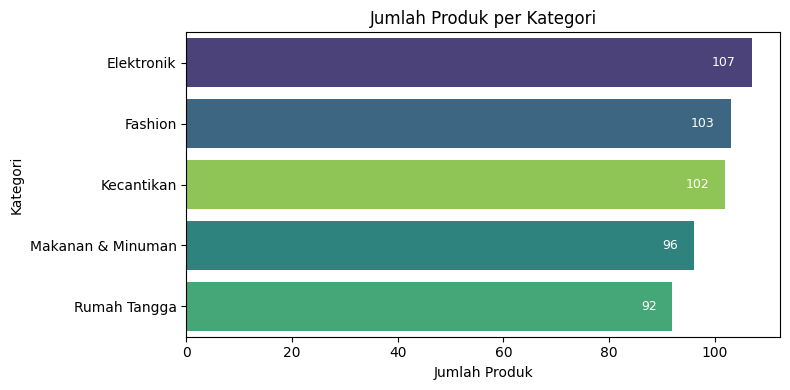

In [7]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df_products, y='category', hue='category', palette='viridis', 
                   order=df_products['category'].value_counts().index)

# Tambahkan label di dalam batang
for p in ax.patches:
    value = int(p.get_width())
    ax.annotate(f'{value}', 
                (p.get_width() - 3, p.get_y() + p.get_height() / 2), 
                va='center', ha='right', color='white', fontsize=9)

plt.title("Jumlah Produk per Kategori")
plt.xlabel("Jumlah Produk")
plt.ylabel("Kategori")
plt.tight_layout()
save_plot(plt.gcf(), "category_distribution.png")
plt.show()


## 💰 Distribusi Harga Produk

Visualisasi harga produk untuk mengetahui rentang dan sebaran harga.

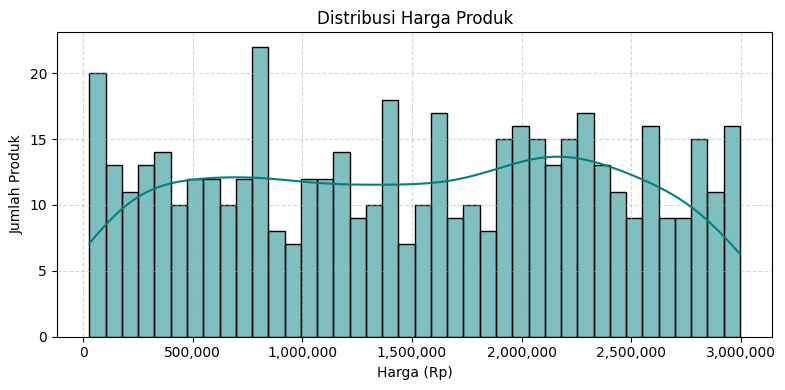

In [10]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8, 4))
sns.histplot(df_products['price'], bins=40, kde=True, color='teal')

# Ubah format angka di sumbu x menjadi biasa (bukan notasi ilmiah)
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title("Distribusi Harga Produk")
plt.xlabel("Harga (Rp)")
plt.ylabel("Jumlah Produk")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ⭐ Rating Produk

Rating bisa mencerminkan kepuasan pelanggan terhadap produk.

📁 Chart saved to outputs/charts/product_rating_distribution.png


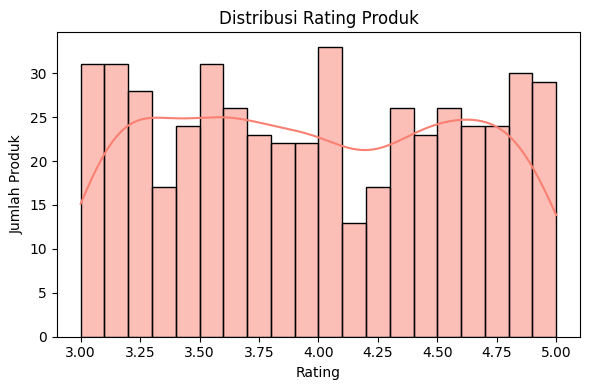

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(df_products['rating'], bins=20, kde=True, color='salmon')
plt.title("Distribusi Rating Produk")
plt.xlabel("Rating")
plt.ylabel("Jumlah Produk")
plt.tight_layout()

save_plot(plt.gcf(), "product_rating_distribution.png")
plt.show()

## 📝 Insight Produk

- Kategori produk paling banyak: Fashion & Elektronik.
- Mayoritas harga produk berada di bawah 1 juta.
- Rating produk banyak yang tinggi, menandakan kepuasan pengguna terhadap produk.

Selanjutnya kita analisis data pembayaran.